# My libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# import excel sheet

In [2]:
df = pd.read_csv("datasets/candyhierarchy2017.csv")
pd.set_option('display.max_columns',None)
df.head()

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M’s,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Mounds,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,Na

# Now we have to see what is in data

In [3]:
print("Number of rows is :" ,df.shape[0])
print("Number of columns is :" ,df.shape[1])

Number of rows is : 2460
Number of columns is : 120


In [4]:
df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 120 columns):
 #    Column                                                                                 Non-Null Count  Dtype  
---   ------                                                                                 --------------  -----  
 0    Internal ID                                                                            2460 non-null   int64  
 1    Q1: GOING OUT?                                                                         2350 non-null   object 
 2    Q2: GENDER                                                                             2419 non-null   object 
 3    Q3: AGE                                                                                2376 non-null   object 
 4    Q4: COUNTRY                                                                            2396 non-null   object 
 5    Q5: STATE, PROVINCE, COUNTY, ETC                                   

## Lots of NaN values in our data

In [5]:
print("Number of duplicates is :" ,df.duplicated().sum())

Number of duplicates is : 0


### Ok now I will remove columns that I see it is useless like `id` (I used it only to know if there is duplicates or no)<br><br> And other columns that means nothing here like `Click Coordinates (x, y)` (I don't care about coordinates here)<br><br> And other rows with too much NaN values like ` "other coments" column has 2074 from 2460 value + uncleaned data` <br><br> For `Despair, joy other` columns I will put them in another dataframe so I may deal with it later ... (if it will be usefull)

In [6]:
columns_to_remove = [0, 113, 115, 116, 117, 118, 119, 111, 110, 109]
despair_joy_other = df[['Q7: JOY OTHER','Q8: DESPAIR OTHER']]
df.drop(df.columns[columns_to_remove], axis=1 , inplace=True)

In [7]:
pd.set_option('display.max_rows',None)
df.isna().sum()

Q1: GOING OUT?                                                                             110
Q2: GENDER                                                                                  41
Q3: AGE                                                                                     84
Q4: COUNTRY                                                                                 64
Q5: STATE, PROVINCE, COUNTY, ETC                                                           100
Q6 | 100 Grand Bar                                                                         747
Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)     734
Q6 | Any full-sized candy bar                                                              672
Q6 | Black Jacks                                                                           958
Q6 | Bonkers (the candy)                                                                   992
Q6 | Bonkers (the board game)                     

In [8]:
pd.reset_option('display.max_rows')

In [9]:
df.head()

,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M’s,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q10: DRESS,Q11: DAY
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday
2,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## Now we are going to clean our data:

## cleaning going out column

#### we will vizualize our data using seaborn

Number of NaN values is :  110

 No     2038
Yes     312
Name: Q1: GOING OUT?, dtype: int64


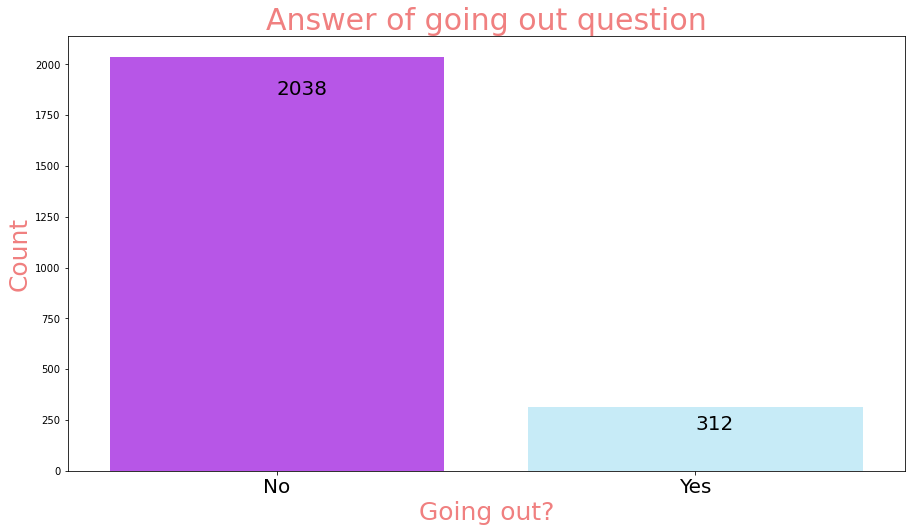

In [10]:
print("Number of NaN values is : ", df["Q1: GOING OUT?"].isna().sum())
print("\n",df["Q1: GOING OUT?"].value_counts())

fig , ax =plt.subplots(figsize=(15,8))
sns.countplot(x="Q1: GOING OUT?" , data=df , palette=["#BF3EFF","#BFEFFF"])
plt.xticks(size=20)
plt.title("Answer of going out question",size=30,c="#F08080")
plt.ylabel('Count',size=25,color='#F08080')
plt.xlabel('Going out?',size=25,color='#F08080')

plt.text(0, 1850, "{}".format(df["Q1: GOING OUT?"].value_counts()[0]),size=20)

plt.text(1, 200, "{}".format(df["Q1: GOING OUT?"].value_counts()[1]),size=20)

plt.show()

Number of nan values is : 0

 No     2098
Yes     362
Name: Q1: GOING OUT?, dtype: int64


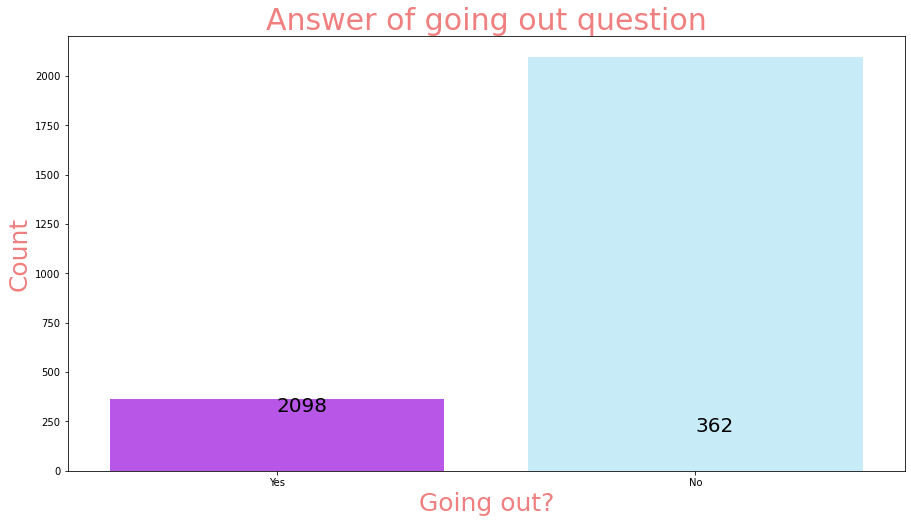

In [11]:
from numpy.random import choice
import random
L =len(df.index)
df["Q1: GOING OUT?"].replace(np.nan, "nan" , inplace =True)
for i in range(L):
    if df["Q1: GOING OUT?"].loc[i] == 'nan':
        df["Q1: GOING OUT?"].loc[i] = random.choice(["No","Yes"])
        
print("Number of nan values is :" , df["Q1: GOING OUT?"].isna().sum())
print("\n",df["Q1: GOING OUT?"].value_counts())

fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x='Q1: GOING OUT?', data=df,palette=["#BF3EFF","#BFEFFF"])

plt.title("Answer of going out question",size=30,c="#F08080")
plt.ylabel('Count',size=25,color='#F08080')
plt.xlabel('Going out?',size=25,color='#F08080')

plt.text(0, 300, "{}".format(df["Q1: GOING OUT?"].value_counts()[0]),size=20)

plt.text(1, 200, "{}".format(df["Q1: GOING OUT?"].value_counts()[1]),size=20)

plt.show()

## time to clean gender column

Number of NaN values is :  41

 Male                  1467
Female                 839
I'd rather not say      83
Other                   30
Name: Q2: GENDER, dtype: int64


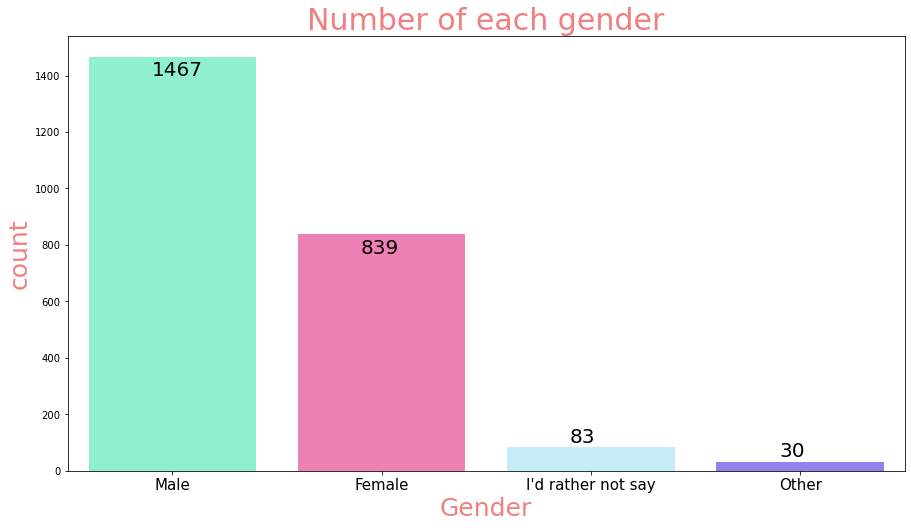

In [12]:
print("Number of NaN values is : ", df["Q2: GENDER"].isna().sum())
print("\n",df["Q2: GENDER"].value_counts())

fig , ax= plt.subplots(figsize=(15,8))
sns.countplot(x="Q2: GENDER" , data=df ,palette=["#7FFFD4","#FF6EB4","#BFEFFF","#8470FF"])

plt .title("Number of each gender" , size=30, color="#F08080")
plt.ylabel("count" ,size=25,color="#F08080")
plt.xlabel("Gender" , size=25,color="#F08080")

plt.text(-.1 ,1400,"{}".format(df["Q2: GENDER"].value_counts()[0]),size=20)

plt.text(.9 ,770,"{}".format(df["Q2: GENDER"].value_counts()[1]),size=20)

plt.text(1.9 ,100,"{}".format(df["Q2: GENDER"].value_counts()[2]),size=20)

plt.text(2.9 , 50,"{}".format(df["Q2: GENDER"].value_counts()[3]),size=20)

plt.xticks(size=15)
plt.show()

### Now it is time to replace nan values with I'd rather not say 

### because i saw that means if he\she didnot want to say that (he is Male \ she is Female)

Number of nan values is : 0

 Male                  1467
Female                 839
I'd rather not say     124
Other                   30
Name: Q2: GENDER, dtype: int64


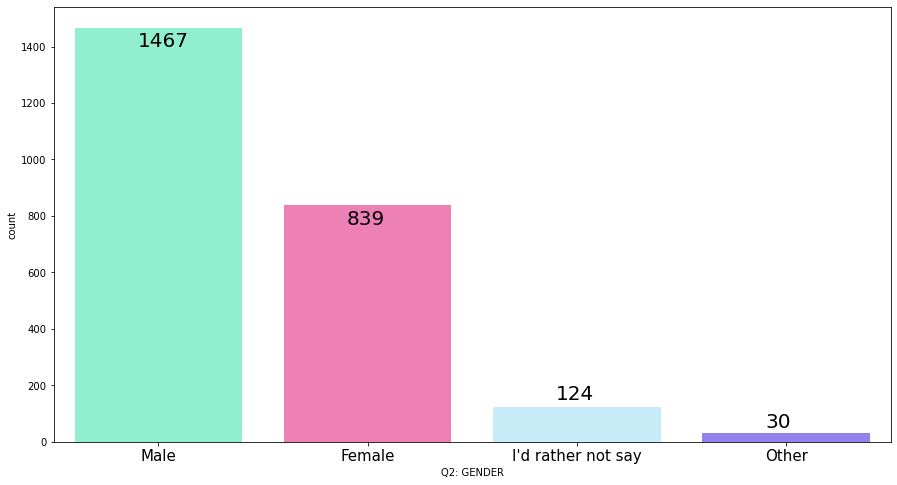

In [13]:
df["Q2: GENDER"].replace(np.nan, "I'd rather not say", inplace= True)

print("Number of nan values is :" ,df["Q2: GENDER"].isna().sum())
print("\n",df["Q2: GENDER"].value_counts())

fig , ax= plt.subplots(figsize=(15,8))
sns.countplot(x="Q2: GENDER" , data=df ,palette=["#7FFFD4","#FF6EB4","#BFEFFF","#8470FF"],order=['Male','Female',"I'd rather not say",'Other'] )

plt.text(-.1 ,1400,"{}".format(df["Q2: GENDER"].value_counts()[0]),size=20)

plt.text(.9 ,770,"{}".format(df["Q2: GENDER"].value_counts()[1]),size=20)

plt.text(1.9 ,150,"{}".format(df["Q2: GENDER"].value_counts()[2]),size=20)

plt.text(2.9 , 50,"{}".format(df["Q2: GENDER"].value_counts()[3]),size=20)

plt.xticks(size=15)
plt.show()

## time to clean age column 

In [14]:
print("Number of nan values is :" ,df["Q3: AGE"].isna().sum())
print(df["Q3: AGE"].value_counts())
print("\n",df["Q3: AGE"].unique())

Number of nan values is : 84
40                 92
34                 90
37                 89
43                 86
42                 79
                   ..
older than dirt     1
5u                  1
Enough              1
See question 2      1
60+                 1
Name: Q3: AGE, Length: 106, dtype: int64

 [nan '44' '49' '40' '23' '53' '33' '43' '56' '64' '37' '59' '48' '54' '36'
 '45' '25' '34' '35' '38' '58' '50' '47' '16' '52' '63' '65' '41' '27'
 '31' '61' '46' '42' '62' '29' '39' '32' '28' '69' '67' '30' '22' '26'
 '51' '70' '24' '18' '19' 'Old enough' '57' '60' '66' '12' 'Many' '55'
 '72' '?' '21' '11' 'no' '9' '68' '20' '6' '10' '71' '90' '13' '45-55'
 '312' '99' '7' 'hahahahaha' '88' '39.4' '74' '102' 'older than dirt' '17'
 '15' '8' '75' '5u' 'Enough' 'See question 2' '24-50' '14' 'Over 50' '100'
 '76' '1000' 'sixty-nine' '46 Halloweens.' 'ancient' '77' 'OLD' 'old' '73'
 '70 1/2' '1' 'MY NAME JEFF' '4' '59 on the day after Halloween'
 'old enough' 'your mom'
 'I can reme

### now I will drop all nan values and the values that arenot digit and replace them with mean

### I can use another way to fill nan like to fill them with the next value of nan but the best way is mean

In [15]:
to_drop = df['Q3: AGE'].str.isdigit()
to_drop.replace(np.nan, False, inplace=True)
droped_nans = df['Q3: AGE'][to_drop].astype('int')

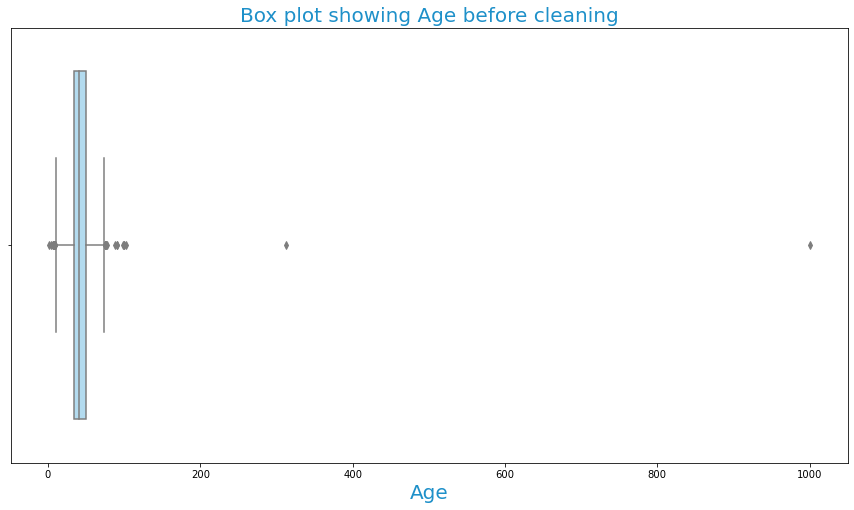

In [16]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(x=droped_nans,color='#A9DEF9')
plt.title('Box plot showing Age before cleaning',size=20,color='#1e90c9')
plt.xlabel('Age',size=20,color='#1e90c9')
plt.show() 

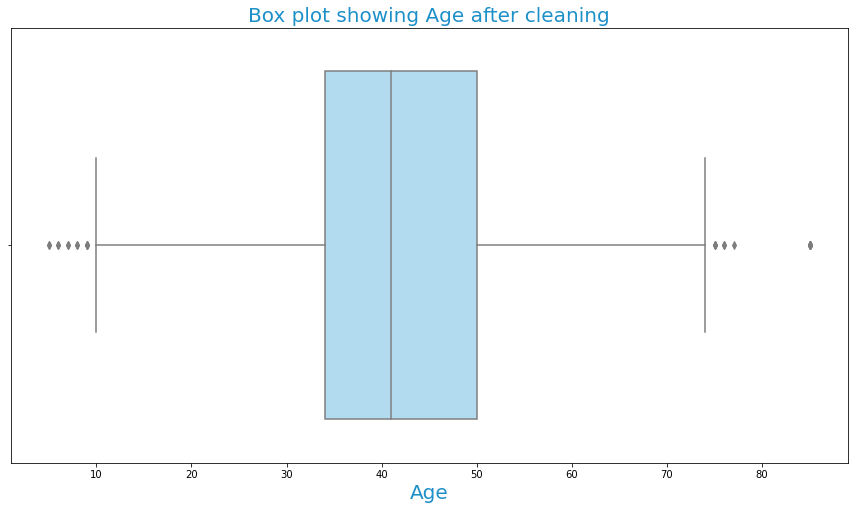

In [17]:
droped_nans[droped_nans > 85] = 85         
droped_nans[droped_nans < 5] = 5     

## others I considered as outliers.... I know I took some of outliers in my data 
## but that is because I see it is reasionable to have people of age 85 or 5 eating candy :)

fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(x=droped_nans,color='#A9DEF9')
plt.title('Box plot showing Age after cleaning',size=20,color='#1e90c9')
plt.xlabel('Age',size=20,color='#1e90c9')
plt.show() 


In [19]:
my_mean = int(droped_nans.mean())
my_std = int(droped_nans.std())

old_words = ['Old', 'Many', 'older', 'Over', '5u', 'ancient', 'old', 'OLD', '60+', 'I']

df['Q3: AGE'].fillna('A NAN', inplace=True)
for i in range(len(df['Q3: AGE'])):
    if i == 2460:
        break
    if str(df['Q3: AGE'].loc[i]).isdigit() == False:
        if df['Q3: AGE'].loc[i] == 'A NAN':
            df['Q3: AGE'].loc[i] = my_mean
        list_of_new_df = str(df['Q3: AGE'].loc[i]).split()
        if list_of_new_df[0] in old_words:
            df['Q3: AGE'].loc[i] = my_mean + my_std
        if list_of_new_df[0].isdigit() == True:
            df['Q3: AGE'].loc[i] = int(list_of_new_df[0])
        else:
            df['Q3: AGE'].loc[i] = my_mean - my_std

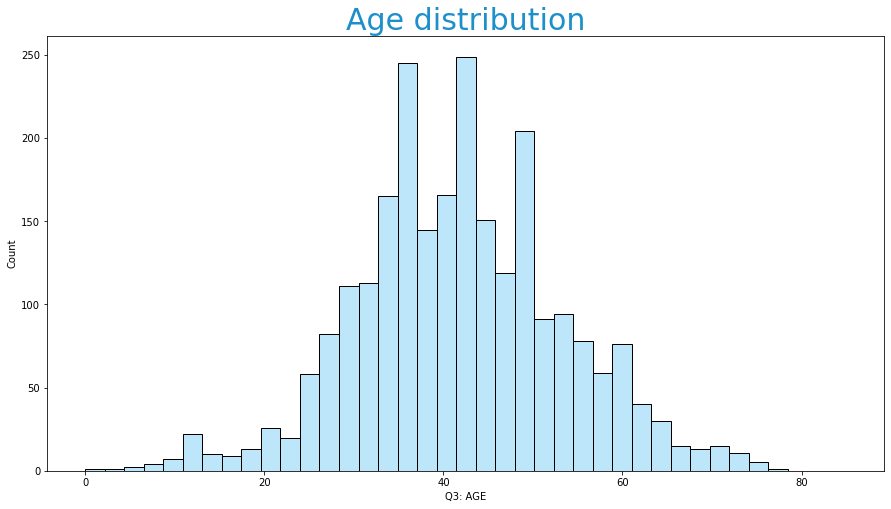

In [20]:
## Finally no nan values in age
df['Q3: AGE'] = df['Q3: AGE'].astype('int')

fig, ax = plt.subplots(figsize=(15, 8))
plt.title('Age distribution',size=30,color='#1e90c9')
sns.histplot(x=df['Q3: AGE'],binrange=[0,85],color='#A9DEF9')
plt.show()

In [21]:
df['Q3: AGE'].value_counts()

42     163
40      92
34      90
37      89
43      86
      ... 
102      1
74       1
88       1
99       1
4        1
Name: Q3: AGE, Length: 81, dtype: int64

###  Now time to clean area column

In [22]:
print(df["Q4: COUNTRY"].isna().sum())
print("\n",df["Q4: COUNTRY"].value_counts())
df['Q4: COUNTRY'].fillna('Unknown', inplace=True)
unique_countries= df["Q4: COUNTRY"].unique()

unique_countries

64

 USA                            699
United States                  497
usa                            217
Canada                         179
Usa                            139
                              ... 
usas                             1
'merica                          1
USA? Hard to tell anymore..      1
Greece                           1
Fear and Loathing                1
Name: Q4: COUNTRY, Length: 128, dtype: int64


array(['Unknown', 'USA ', 'USA', 'us', 'usa', 'canada', 'Canada', 'Us',
       'US', 'Murica', 'United States', 'uk', 'United Kingdom',
       'united states', 'Usa', 'United States ', 'United staes',
       'United States of America', 'UAE', 'England', 'UK', 'canada ',
       'Mexico', 'United states', 'u.s.a.', 'USAUSAUSA', 'america', '35',
       'france', 'United States of America ', 'U.S.A.', 'finland',
       'unhinged states', 'Canada ', 'united states of america',
       'US of A', 'Unites States', 'The United States', 'North Carolina ',
       'Unied States', 'Netherlands', 'germany', 'Europe', 'Earth', 'U S',
       'u.s.', 'U.K. ', 'Costa Rica', 'The United States of America',
       'unite states', 'U.S.', '46', 'cascadia', 'Australia',
       'insanity lately', 'Greece', 'USA? Hard to tell anymore..',
       "'merica", 'usas', 'Pittsburgh', '45', 'United State', '32',
       'France', 'australia', 'A', 'Can', 'Canae', 'New York',
       'Trumpistan', 'Ireland', 'United Sat

In [23]:
df['Q4: COUNTRY'] = df['Q4: COUNTRY'].str.strip().str.lower()

countries = pd.Series(['usa', 'united states of america','america','united kingdom england', 'hong kong', 'china', 'sweden', 'spain',
                       'ireland', 'taiwan', 'singapore', 'netherlands', 
                       'indonesia', 'south korea', 'switzerland', 'denmark', 'scotland', 'canada', 'iceland', 'south africa', 
                       'japan', 'greece', 'costa rica', 'germany', 'finland', 'france', 'mexico'])


for country in countries:
    matches = process.extract(country, df['Q4: COUNTRY'], limit = df.shape[0])
    for potential_match in matches:
        if potential_match[1] >= 80:
            df.loc[df['Q4: COUNTRY'] == potential_match[0], 'Q4: COUNTRY'] = country
            
df['Q4: COUNTRY'].unique()     

array(['unknown', 'usa', 'canada', 'murica', 'america', 'uk', 'uae',
       'united kingdom england', 'mexico', 'u.s.a.', '35', 'france',
       'finland', 'north carolina', 'netherlands', 'germany', 'europe',
       'earth', 'u.k.', 'costa rica', '46', 'cascadia', 'australia',
       'insanity lately', 'greece', 'usa? hard to tell anymore..',
       'pittsburgh', '45', '32', 'canae', 'new york', 'trumpistan',
       'iceland', 'south korea', 'california', 'japan', 'south africa',
       'scotland', 'denmark', 'switzerland', 'ud', 'new jersey',
       'indonesia', 'endland', 'atlantis', 'murrika', 'alaska',
       'soviet canuckistan', 'singapore', 'china', 'taiwan', 'hong kong',
       'spain', 'sweden', 'narnia', 'u s a', '1',
       'subscribe to dm4uz3 on youtube', "i don't know anymore",
       'fear and loathing'], dtype=object)

In [24]:
df['Q4: COUNTRY'].value_counts()

usa                               1319
america                            726
canada                             226
unknown                             64
uk                                  18
germany                             10
u.s.a.                               8
netherlands                          7
australia                            7
iceland                              5
scotland                             5
japan                                5
mexico                               4
france                               3
switzerland                          3
denmark                              2
south korea                          2
hong kong                            2
china                                2
sweden                               2
narnia                               1
indonesia                            1
i don't know anymore                 1
subscribe to dm4uz3 on youtube       1
ud                                   1
new jersey               

In [25]:
mapped = {"america":"usa","murica":"usa",'u.s.a.':'usa','north carolina':'usa','usa? hard to tell anymore..':'usa',
          'pittsburgh':'usa','new york':'usa','trumpistan':'usa','california':'usa','ud':'unowkn','32':'unknown','45':'unknown'
          ,'new jersey':'usa','endland':'uk','soviet canuckistan':'canada','u s a':'usa','united kingdom england':'uk','u.k.':'uk'
          ,'cascadia':'usa','1':'unknown','fear and loathing':'unknown',"i don't know anymore":'unknown','murica':'unknown'
          ,'atlantis':'unknown','subscribe to dm4uz3 on youtube':'unknown','murrika':'unknown','narnia':'unknown','ud':'unknown'
          ,'new jersey':'usa','murrika':'unknown','35':'unknown','earth':'unknown','46':'unknown','insanity lately':'unknown'
          ,'europe':'unknown','canae':'uk','hong kong':'china'}


df["Q4: COUNTRY"] = df["Q4: COUNTRY"].replace(mapped)
df["Q4: COUNTRY"].value_counts()

usa             2062
canada           227
unknown           80
uk                22
germany           10
australia          7
netherlands        7
scotland           5
japan              5
iceland            5
mexico             4
china              4
france             3
switzerland        3
denmark            2
sweden             2
south korea        2
south africa       1
uae                1
finland            1
indonesia          1
alaska             1
singapore          1
greece             1
taiwan             1
spain              1
costa rica         1
Name: Q4: COUNTRY, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

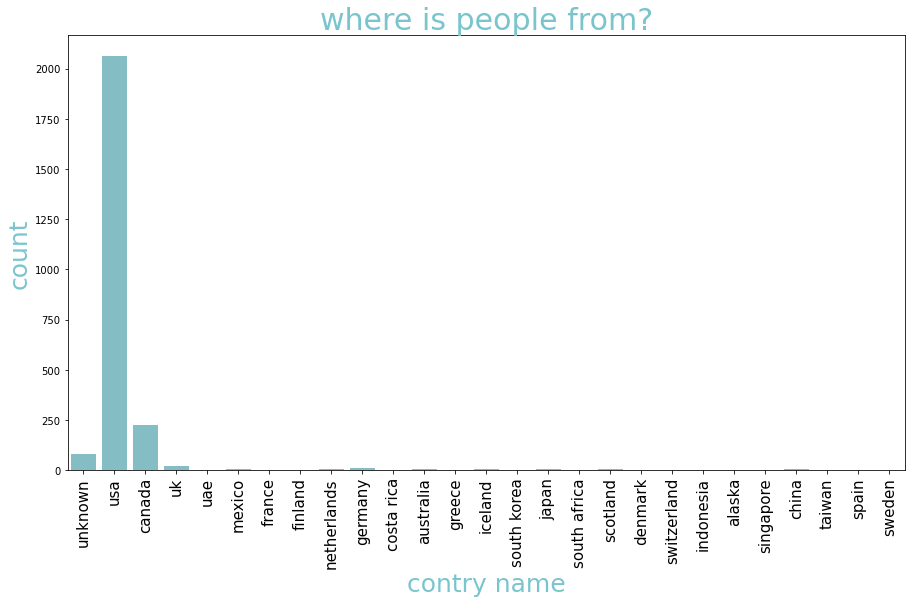

In [26]:
fig , ax =plt.subplots(figsize=(15,8))
plt.title("where is people from?",size=30,color="#7AC5CD")
sns.countplot(x="Q4: COUNTRY" ,data=df,color="#7AC5CD")
plt.ylabel("count",size=25,color="#7AC5CD")
plt.xlabel("contry name",size=25,color="#7AC5CD")
plt.xticks(rotation=90,size=15)
plt.show

### Now time to clean Q6 columns

In [27]:
Q6 = df.columns[5:108]
q6 =df[Q6]
q6.head()

,Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M’s,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH

### I will replace nan with unkown 

In [28]:
q6.fillna("Unknown" ,inplace=True)

### i will try now to make 2 a pount system ,the first is for score of candy(good , bad) ,the second is for popularity of candy (known ,unknown)

In [29]:
candy_system1 = q6.replace(["JOY","DESPAIR","MEH","Unknown"],[1,-1,0,0])
candy_system1.head()

,Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M’s,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,-1,1,0,-1,-1,-1,-1,-1,-1,0,0,-1,0,1,0,-1,-1,-1,-1,-1,0,1,-1,-1,-1,-1,0,-1,0,0,-1,0,1,1,0,-1,-1,0,-1,-1,-1,-1,-1,1,-1,0,0,1,0,-1,-1,-1,0,0,1,1,0,1,1,1,1,-1,-1,0,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,-1,-1,-1,0,-1,-1,0,-1,0,-1,-1,-1,-1,1,1,-1,1,-1,-1,-1,-1,-1,-1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,-1,1,0,0,-1,0,-1,-1,0,0,-1,-1,0,1,0,1,0,-1,-1,-1,1,1,0,0,1,1,0,-1,1,0,0,-1,0,0,0,0,0,0,-1,-1,-1,-1,0,0,1,1,0,1,1,-1,1,0,0,-1,1,0,1,0,0,0,0,0,-1,-1,0,0,-1,0,0,0,-1,-1,-1,-1,1,0,0,0,-1,-1,-1,0,1,0,-1,0,0,1,0,1,0,-1,-1,1,0,1,-1,1,1,-1,-1,-1
4,1,-1,1,-1,0,-1,0,-1,-1,0,0,-1,-1,1,0,1,-1,-1,0,-1,-1,0,1,-1,-1,-1,0,0,-1,1,0,-1,-1,1,0,0,-1,0,1,0,1,-1,-1,1,1,1,1,0,-1,1,0,0,-1,0,0,1,1,1,1,1,1,1,0,-1,1,1,0,-1,1,1,1,0,-1,1,-1,1,1,0,1,0,1,1,-1,0,0,-1,1,1,0,-1,0,-1,-1,1,1,-1,1,0,1,1,-1,-1,1


In [30]:
candy_score_list=[]
for i in candy_system1.columns:
    candy_score = candy_system1[i].sum()
    candy_score_list.append(candy_score)
scores_table=list(zip(list(candy_system1.columns),candy_score_list))
candy_score_table =pd.DataFrame(scores_table, columns=["candy name","candy score"])

candy_score_table.head()

,candy name,candy score
0,Q6 | 100 Grand Bar,788
1,Q6 | Anonymous brown globs that come in black ...,-913
2,Q6 | Any full-sized candy bar,1542
3,Q6 | Black Jacks,-701
4,Q6 | Bonkers (the candy),-379


### best 5 candies

In [31]:
the_best=candy_score_table.nlargest(n=5 , columns=["candy score"])
the_best

,candy name,candy score
2,Q6 | Any full-sized candy bar,1542
75,Q6 | Reese’s Peanut Butter Cups,1403
44,Q6 | Kit Kat,1395
14,"Q6 | Cash, or other forms of legal tender",1374
96,Q6 | Twix,1342


###  worst 5 candies

In [32]:
the_worst= candy_score_table.nsmallest(n=5 , columns=["candy score"])
the_worst

,candy name,candy score
8,Q6 | Broken glow stick,-1601
28,Q6 | Gum from baseball cards,-1418
100,Q6 | White Bread,-1411
74,Q6 | Real Housewives of Orange County Season 9...,-1389
20,Q6 | Dental paraphenalia,-1342


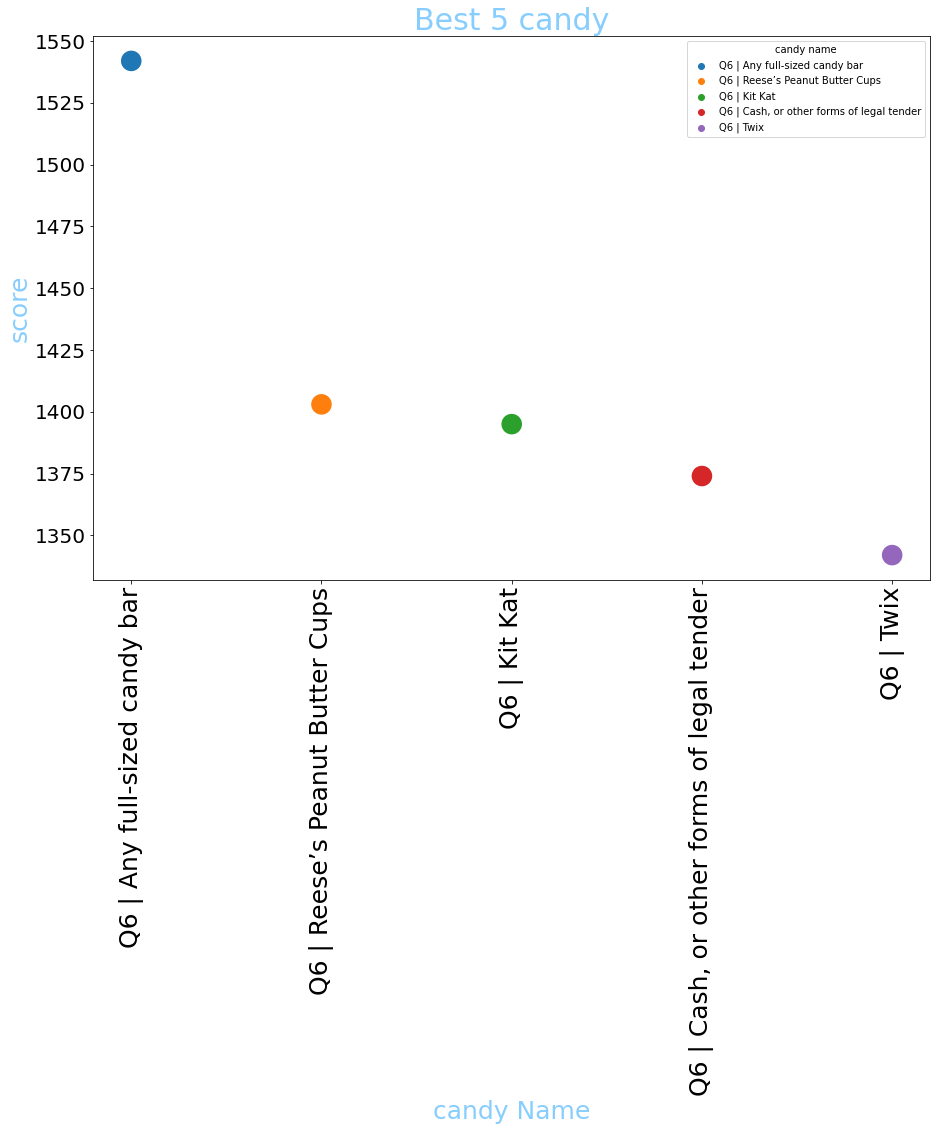

In [33]:
fig , ax =plt.subplots(figsize=(15,10))
b = sns.scatterplot(x="candy name",y="candy score",s=500,data=the_best,hue="candy name")
plt.title("Best 5 candy",size=30,color="#87CEFF")
plt.xticks(rotation=90,size=25)
plt.yticks(size=20)
plt.xlabel('candy Name',size=25,color="#87CEFF")
plt.ylabel('score',size=25,color="#87CEFF")
plt.show()

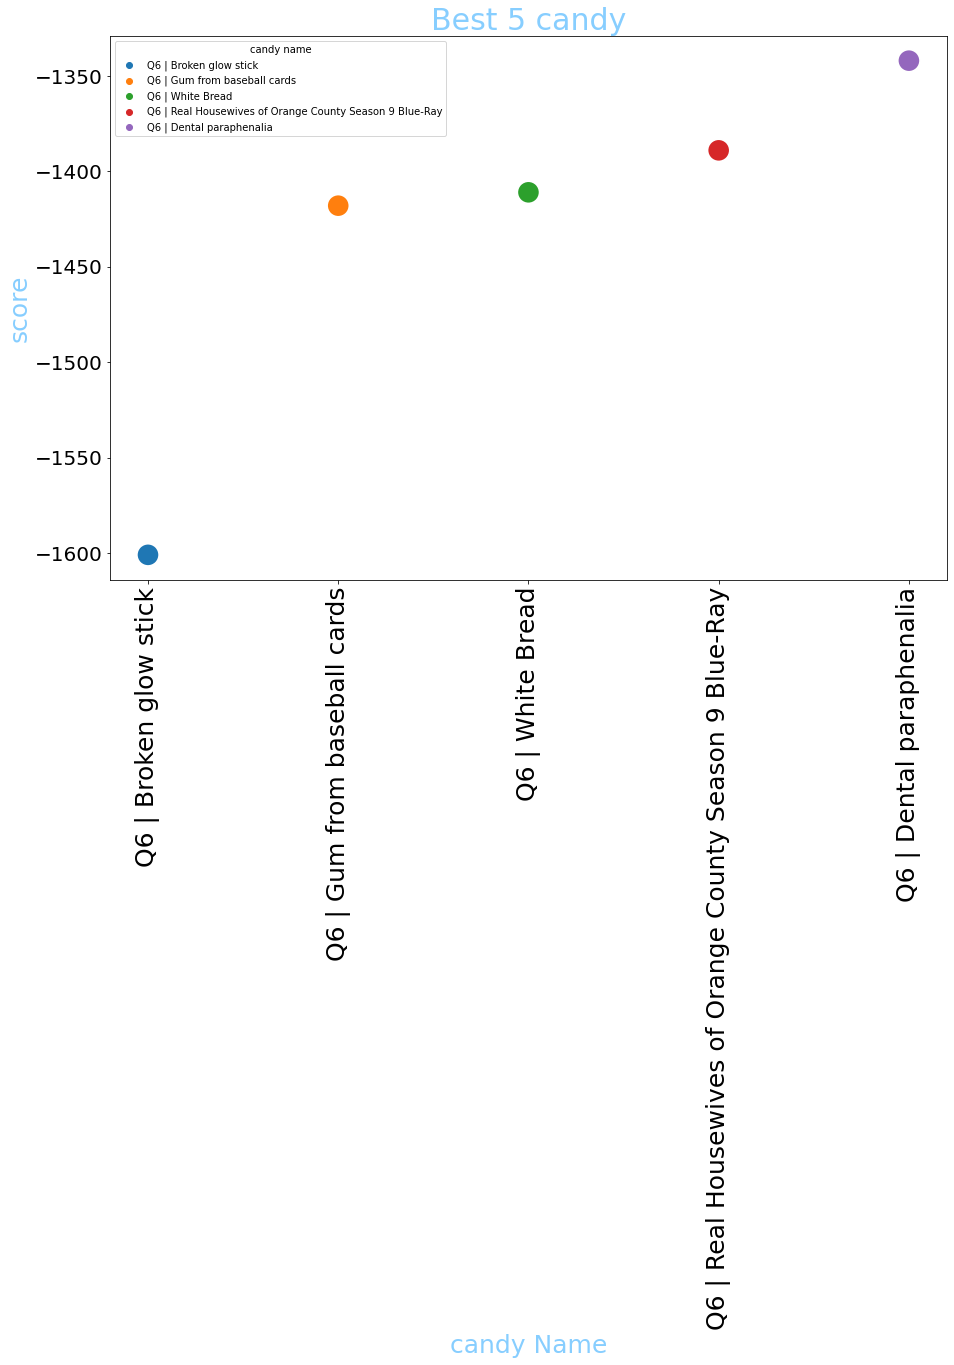

In [34]:
fig , ax =plt.subplots(figsize=(15,10))
b = sns.scatterplot(x="candy name",y="candy score",s=500,data=the_worst,hue="candy name")
plt.title("Best 5 candy",size=30,color="#87CEFF")
plt.xticks(rotation=90,size=25)
plt.yticks(size=20)
plt.xlabel('candy Name',size=25,color="#87CEFF")
plt.ylabel('score',size=25,color="#87CEFF")
plt.show()

### now we got best and worst candies 

###### Now time to know the most famous candy

In [35]:
candy_fame = q6.replace(["JOY","DESPAIR","MEH","Unknown"],[0,0,0,1])
candy_fame.head()

,Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M’s,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
candy_fame_list =[]
for i in candy_fame.columns:
    candy_fame_points = candy_fame[i].sum()
    candy_fame_list.append(candy_fame_points)
fame_table=list(zip(list(candy_fame.columns),candy_fame_list))
candy_fame_table = pd.DataFrame(fame_table,columns=['candy name', 'how much is the candy unfamous'])
candy_fame_table

,candy name,how much is the candy unfamous
0,Q6 | 100 Grand Bar,747
1,Q6 | Anonymous brown globs that come in black ...,734
2,Q6 | Any full-sized candy bar,672
3,Q6 | Black Jacks,958
4,Q6 | Bonkers (the candy),992
...,...,...
98,Q6 | Vicodin,789
99,Q6 | Whatchamacallit Bars,823
100,Q6 | White Bread,757
101,Q6 | Whole Wheat anything,747


### most unfamous candies

In [37]:
unfamous = candy_fame_table.nsmallest(n=5 ,columns=["how much is the candy unfamous"])
unfamous

,candy name,how much is the candy unfamous
57,Q6 | Peanut M&M’s,671
2,Q6 | Any full-sized candy bar,672
34,Q6 | Hershey’s Milk Chocolate,672
33,Q6 | Hershey's Dark Chocolate,673
44,Q6 | Kit Kat,674


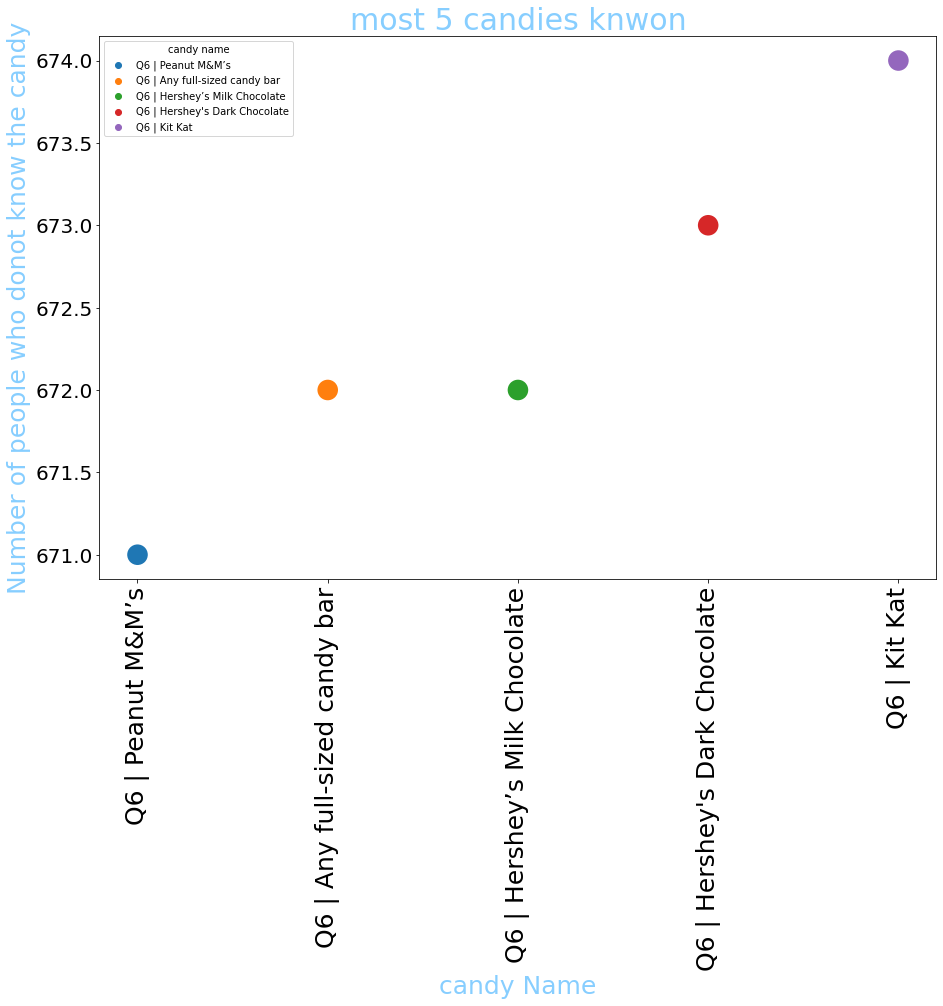

In [38]:
fig , ax =plt.subplots(figsize=(15,10))
b = sns.scatterplot(x="candy name",y="how much is the candy unfamous",s=500,data=unfamous ,hue="candy name")
plt.title("most 5 candies knwon",size=30,color="#87CEFF")
plt.xticks(rotation=90,size=25)
plt.yticks(size=20)
plt.xlabel('candy Name',size=25,color="#87CEFF")
plt.ylabel('Number of people who donot know the candy',size=25,color="#87CEFF")
plt.show()

### Now it is time to clean dress column

Number of nan values is :  744

 White and gold    1081
Blue and black     635
Name: Q10: DRESS, dtype: int64


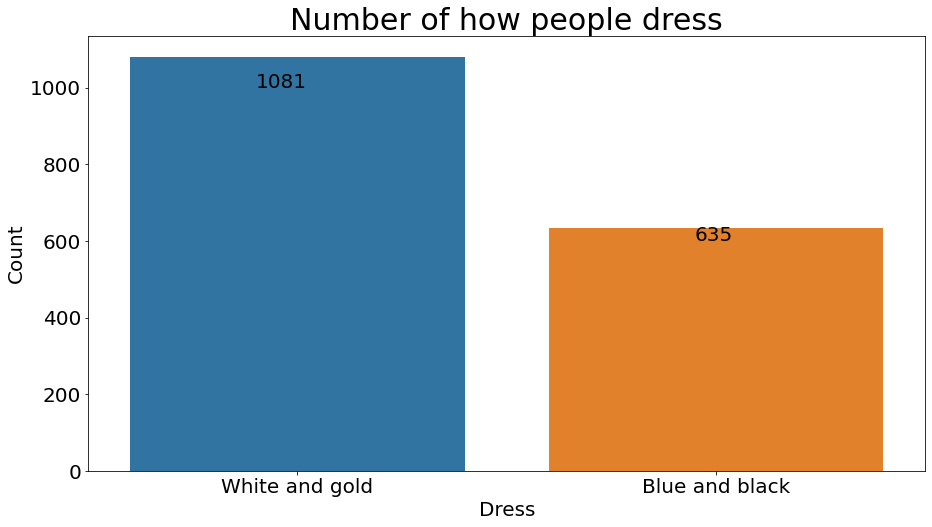

In [39]:
print("Number of nan values is : ",df["Q10: DRESS"].isna().sum())
print('\n',df["Q10: DRESS"].value_counts())

numbers_to_drop = [42.605444491705654, 41.92592471306905]

# Drop rows where 'Q10: DRESS' column contains the specified numbers
df = df.loc[~df['Q10: DRESS'].isin(numbers_to_drop)]


fig , ax =plt.subplots(figsize=(15,8))
sns.countplot(x="Q10: DRESS",data =df)
plt.title("Number of how people dress",size=30)
plt.ylabel("Count",size=20)
plt.xlabel("Dress",size=20)

plt.text(-.1 ,1000,"{}".format(df["Q10: DRESS"].value_counts()[0]),size=20)
plt.text(.95 ,600,"{}".format(df["Q10: DRESS"].value_counts()[1]),size=20)


plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

Number of nan values is: 0

 White and gold    1454
Blue and black    1006
Name: Q10: DRESS, dtype: int64


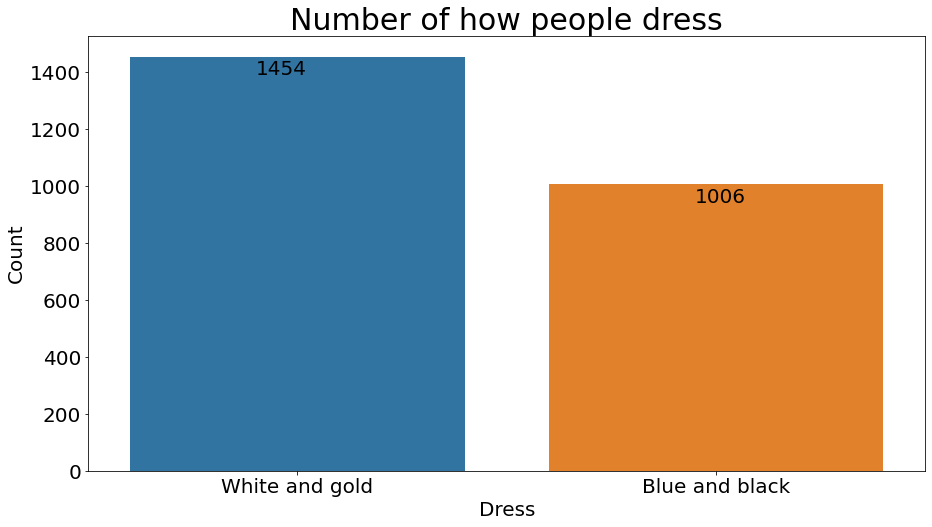

In [40]:
L = df.shape[0]
random.seed(1)
df["Q10: DRESS"].replace(np.nan, "the nan", inplace=True)

# Iterate through rows using iterrows()
for index, row in df.iterrows():
    if row["Q10: DRESS"] == "the nan":
        df.at[index, "Q10: DRESS"] = random.choice(["White and gold", "Blue and black"])

print("Number of nan values is:", df["Q10: DRESS"].isna().sum())
print("\n", df["Q10: DRESS"].value_counts())

fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x="Q10: DRESS", data=df)
plt.title("Number of how people dress", size=30)
plt.ylabel("Count", size=20)
plt.xlabel("Dress", size=20)

plt.text(-0.1, 1390, "{}".format(df["Q10: DRESS"].value_counts()[0]), size=20)
plt.text(0.95, 940, "{}".format(df["Q10: DRESS"].value_counts()[1]), size=20)

plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

### Time to clean Day column

Number of nan values is :  725

 Friday    1091
Sunday     644
Name: Q11: DAY, dtype: int64


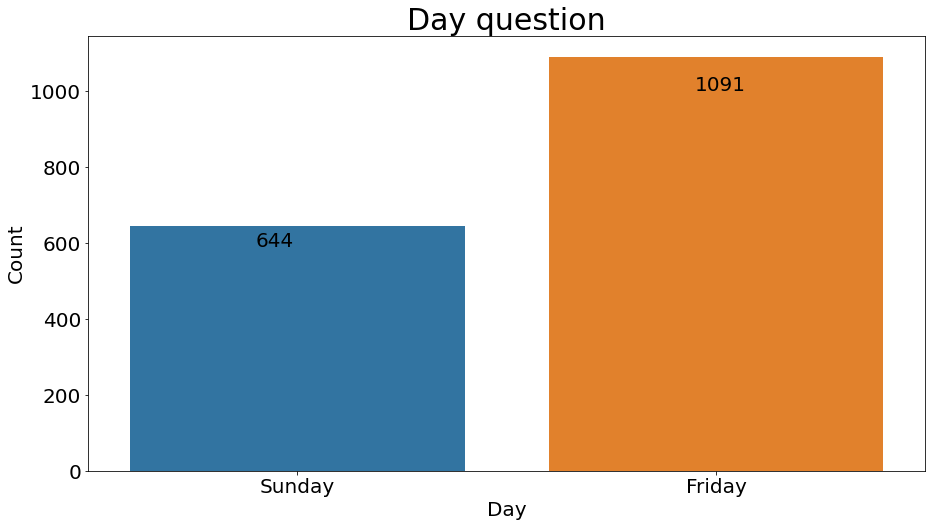

In [41]:
print("Number of nan values is : ",df["Q11: DAY"].isna().sum())
print('\n',df["Q11: DAY"].value_counts())

fig , ax =plt.subplots(figsize=(15,8))
sns.countplot(x="Q11: DAY",data =df)
plt.title("Day question",size=30)
plt.ylabel("Count",size=20)
plt.xlabel("Day",size=20)

plt.text(-.1 ,590,"{}".format(df["Q11: DAY"].value_counts()[1]),size=20)
plt.text(.95 ,1000,"{}".format(df["Q11: DAY"].value_counts()[0]),size=20)

plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

Number of nan values is: 0

 Friday    1451
Sunday    1009
Name: Q11: DAY, dtype: int64


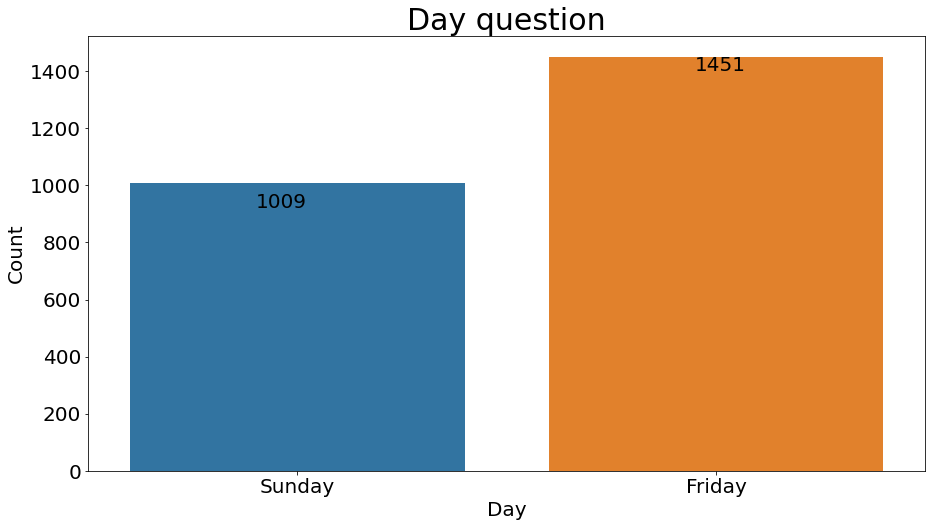

In [42]:
# Assuming you have a DataFrame named 'df'

random.seed(1)
df['Q11: DAY'].replace(np.nan, 'the nan', inplace=True)

# Iterate through rows using iterrows()
for index, row in df.iterrows():
    if row["Q11: DAY"] == "the nan":
        df.at[index, "Q11: DAY"] = random.choice(['Sunday', 'Friday'])

print("Number of nan values is:", df["Q11: DAY"].isna().sum())
print('\n', df["Q11: DAY"].value_counts())

fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x="Q11: DAY", data=df)
plt.title("Day question", size=30)
plt.ylabel("Count", size=20)
plt.xlabel("Day", size=20)

plt.text(-0.1, 920, "{}".format(df["Q11: DAY"].value_counts()[1]), size=20)
plt.text(0.95, 1400, "{}".format(df["Q11: DAY"].value_counts()[0]), size=20)

plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

### I cleaned the data No column now has nan values. <br> All are replaced either by random values or by values I choose like mean or other things
### Previously I printed Candy data that I think is the most popular, I will show it again here <br> but I also printed candies that I think is famous and many people knows it 

### Most loved :

In [43]:
candy_score_table.nlargest(n=5, columns=['candy score'])

,candy name,candy score
2,Q6 | Any full-sized candy bar,1542
75,Q6 | Reese’s Peanut Butter Cups,1403
44,Q6 | Kit Kat,1395
14,"Q6 | Cash, or other forms of legal tender",1374
96,Q6 | Twix,1342


### Least Loved:

In [44]:
candy_score_table.nsmallest(n=5, columns=['candy score'])

,candy name,candy score
8,Q6 | Broken glow stick,-1601
28,Q6 | Gum from baseball cards,-1418
100,Q6 | White Bread,-1411
74,Q6 | Real Housewives of Orange County Season 9...,-1389
20,Q6 | Dental paraphenalia,-1342


## I also now know that :
> 1-Most people aren't going out <br><br>
> 2-The most gender is for males <br><br>
> 3-Mean age is 43 (before my dataset even more baised towards mean) <br><br>
> 4-Most people are from USA <br><br>
> 5-Most and least popular candies are in the table above <br><br>
> 6-Most people prefers Friday <br><br>